In [2]:
# NB: per eseguire questo notebook come file Python, scegliere il menù "File -> Download as -> Python (.py)" .
# Da Canopy, scommentando questa istruzione si hanno i grafici nella console e non in finestre aggiuntive:
#get_ipython().magic(u'matplotlib inline')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import gaussian
from stft import *
from hamming import *

fc =  44100
istart =  50000


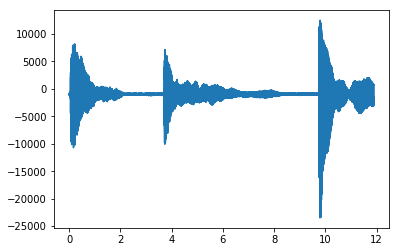

In [3]:
# ATTENZIONE: SISTEMARE IL PATH !
selezione = 3
if selezione==1:
  fc,ytot = wavfile.read('../../MATERIALE_DA_TENERE_SU_HOMEPAGE/intro_KeithJarrett_Country.wav')
  I = np.where(ytot[:,0] >= 10)
  istart = I[0][0] # ci possono essere fino a due secondi di silenzio all'inizio della traccia
  N = 65536  # numero di campioni del segnale campionato a 44.1 KHz
  a = 128  # passo di traslazione nel tempo
  b = 16  # passo di campionamento in frequenza
elif selezione==2:
  fc,ytot = wavfile.read('../../MATERIALE_DA_TENERE_SU_HOMEPAGE/pianoforte_4.wav')  # note "legate"
  istart = 46000
  N = 65536*4  # numero di campioni del segnale campionato a 44.1 KHz
  a = 128*4  # passo di campionamento nel tempo
  b = 32*2  # passo di campionamento in frequenza
elif selezione==3:
  fc,ytot = wavfile.read('../../MATERIALE_DA_TENERE_SU_HOMEPAGE/pianoforte_3.wav')  # note "staccate"
  istart = 50000
  N = 65536*8  # numero di campioni del segnale campionato a 44.1 KHz
  a = 128*8  # passo di campionamento nel tempo
  b = 32*2  # passo di campionamento in frequenza
#endif
print("fc = ", fc)
print("istart = ", istart)
y = ytot[istart+np.arange(N),:]
#wavfile.play(y, fc)
y = y[:,0] 
plt.figure(1); plt.plot(np.arange(float(N))/fc, y); plt.show()

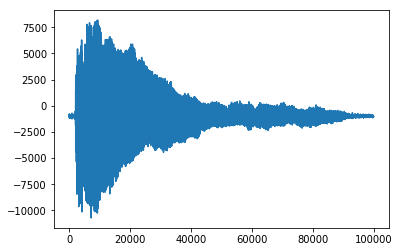

In [4]:
plt.figure(1); plt.plot(y[0:100000]); plt.show()

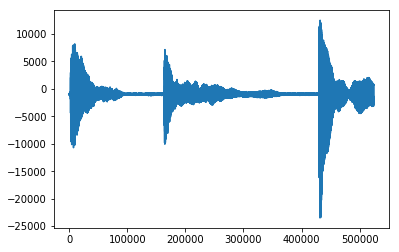

df =  2.205  [Hz]


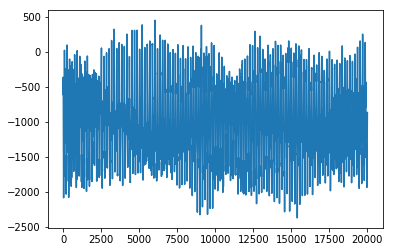

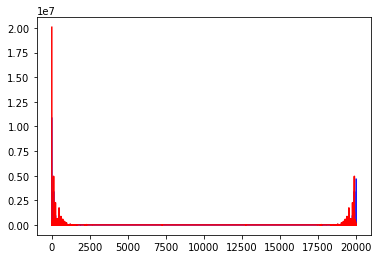

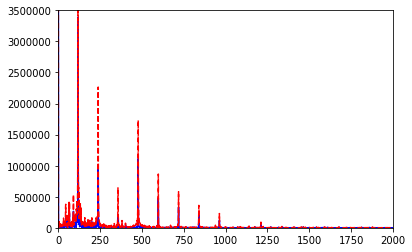

In [4]:
plt.figure(11); plt.plot(y); plt.show()
start1 = 50000; N1 = 20000; y1 = y[start1:start1+N1]
print("df = ",fc/N1, " [Hz]")
plt.figure(12); plt.plot(y1); plt.show()
w1 = hamming(N1)
Y1 = fft(y1)
WY1 = fft(w1 * y1)
plt.figure(13); plt.plot(np.abs(WY1),'b-'); plt.plot(np.abs(Y1),'r-'); plt.show()  
plt.figure(14); plt.axis([0., 2000., 0., 3500000.]); plt.plot(np.abs(WY1[0:2000]),'b-'); plt.plot(np.abs(Y1[0:2000]),'r--'); plt.show()

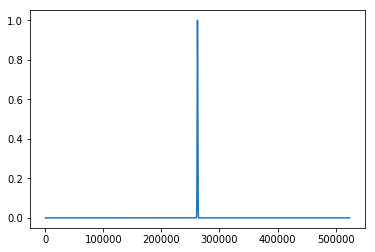

In [4]:
sigma = 512
g = gaussian(N, sigma) # costruzione della gaussiana:
                       # e' una gaussiana di centro c e deviazione standard sigma che e'
                       # calcolata  nei punti [0:N-1];
                       # e' infatti ipotizzato che la sequenza di dati lunga N abbia gli indici
                       # che corrono da 0 a N-1
plt.figure(21); plt.plot(g); plt.show()

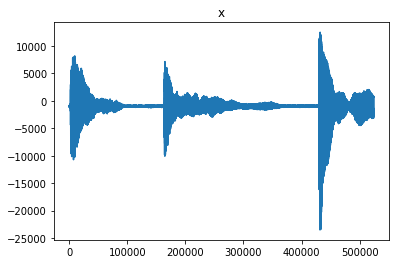

n =  524288
a =  1024
n/a =  512.0
b =  64
n/b =  8192.0


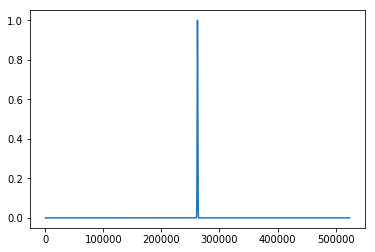

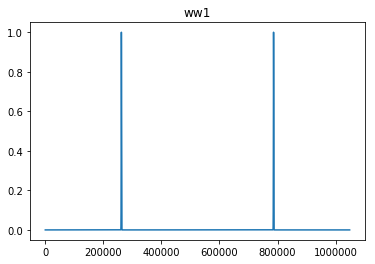

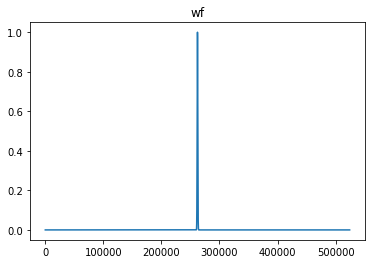

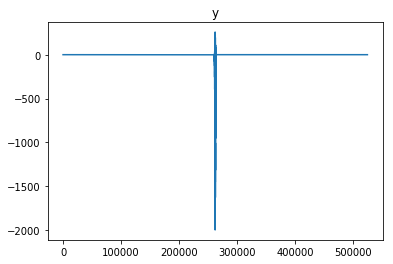

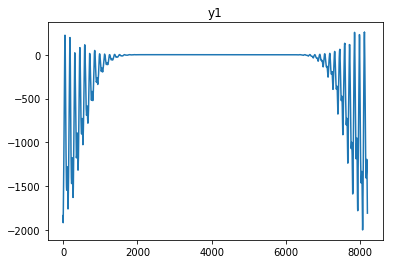

/Users/marcuzzi/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


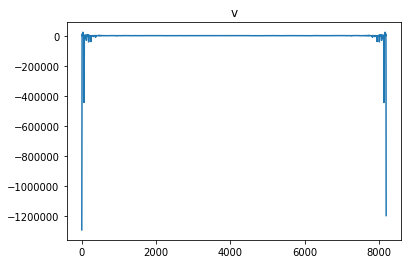

/Users/marcuzzi/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:30: ComplexWarning: Casting complex values to real discards the imaginary part


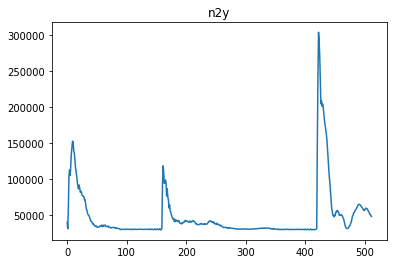

In [5]:
# C = stft(y,g,a,b) :
x = y.copy()
plt.figure(39); plt.plot(x); plt.title('x'); plt.show()
w = g
n = len(x)
print("n = ",n)
print("a = ",a)
print("n/a = ",n/a)
print("b = ",b)
print("n/b = ",n/b)
nt = int(n/a)
res = np.zeros((nt,int(n/b))) 
w1 = np.concatenate((w, np.zeros(n-len(w)))) 
plt.figure(40); plt.plot(w1)
ww1 = np.concatenate((w1, w1))  
plt.figure(42); plt.plot(ww1); plt.title('ww1'); plt.show()
n2y = np.zeros(nt)
for jj in range(nt): 
  wf = ww1[ (n - jj*a) : (2*n - jj*a) ]
  y  = x * wf
  n2y[int(jj+nt/2) % nt] = np.linalg.norm(y,2)
  y1 = perbas(y,b)
  v = fft(y1)
  if jj==0:
    plt.figure(100+jj); plt.plot(wf); plt.title('wf'); plt.show()
    plt.figure(200+jj); plt.plot(y); plt.title('y'); plt.show()
    plt.figure(300+jj); plt.plot(y1); plt.title('y1'); plt.show()
    plt.figure(400+jj); plt.plot(v); plt.title('v'); plt.show()
  #endif
  res[int(jj+nt/2) % nt][:] = v 
#endfor
plt.figure(999); plt.plot(n2y); plt.title('n2y'); plt.show()
C = res.T 

(8192, 512)


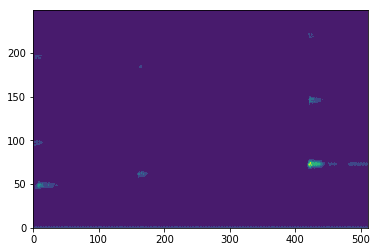

In [6]:
print(C.shape)
plt.figure(2000); plt.contourf(np.array(np.abs(C[0:250,0:1000])))
#spettrog_musica(C,N,a,b);

In [7]:
np.abs(C[0:80,0:50])

array([[1.30758131e+06, 1.30366714e+06, 1.27032292e+06, ...,
        1.28721038e+06, 1.30794391e+06, 1.30689802e+06],
       [1.21040265e+06, 8.60001592e+05, 2.18583823e+03, ...,
        8.45673861e+05, 1.21096320e+06, 8.60086856e+05],
       [9.59862846e+05, 1.47959739e+04, 9.32147197e+05, ...,
        7.94867130e+03, 9.60809911e+05, 9.03961265e+03],
       ...,
       [7.96118243e+04, 2.59266299e+03, 4.59325568e+04, ...,
        4.96724125e+02, 4.14135705e+03, 9.72124412e+03],
       [1.05934970e+04, 1.56853064e+04, 4.79679406e+04, ...,
        1.13839788e+03, 4.23053191e+03, 7.32952226e+03],
       [2.32106924e+04, 1.72742475e+04, 1.66188273e+05, ...,
        3.55578436e+03, 3.16084772e+03, 2.20108082e+03]])

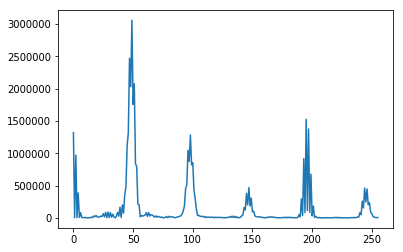

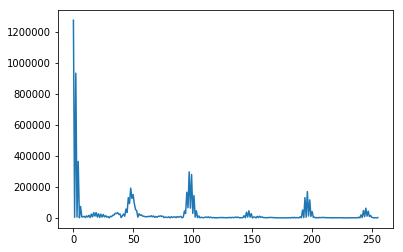

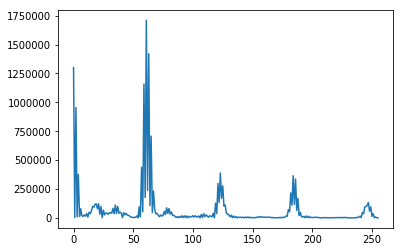

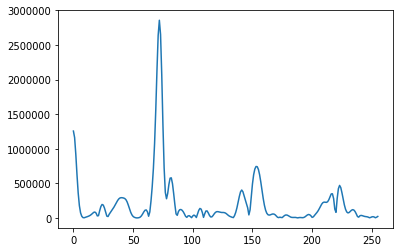

In [8]:
plt.figure(1); plt.plot(abs(C[0:256,10]))  # prima nota
plt.figure(2); plt.plot(abs(C[0:256,50]))  # rumore sottofondo prevale
plt.figure(3); plt.plot(abs(C[0:256,170]))  # seconda nota
plt.figure(4); plt.plot(abs(C[0:256,420]))  # terza nota

In [ ]:
perbas(np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]),3)